In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [9]:
np.random.seed(0)

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def generate_data(m):
    # returns the true w as well as X, Y data
     # Step 1: Generate w* from a standard normal distribution
    w_true = np.random.randn(10)
    
    # Normalize w* to have an Euclidean norm of 1
    w_true /= np.linalg.norm(w_true)
    
    # Step 2: Generate the training set
    X = np.random.randn(m, 10)
    
    # Calculate the probability for y_i to be 1
    probabilities = sigmoid(np.dot(X, w_true))
    
    # Generate y_i based on the calculated probabilities
    Y = np.random.rand(m) <= probabilities
    
    return w_true, X, Y.astype(int)

In [12]:
# Generate a training set of size m
m = 1000  # Example size
w_star, X, Y = generate_data(m)
w_star, X[:5], Y[:5]  # Display the true w_star, and the first 5 samples of X and Y

(array([ 0.4585559 ,  0.10401871,  0.25441767,  0.58250812,  0.48546164,
        -0.25403812,  0.24697037, -0.03934449, -0.02683118,  0.10673287]),
 array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
          0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
        [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
         -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
        [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
          0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
        [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
         -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
        [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
          0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]]),
 array([1, 1, 1, 0, 0]))

In [13]:
np.linalg.norm(w_star)

1.0

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [14]:
def train_logistic_regression(X, Y):
    # Create a logistic regression model with a maximum of 1000 iterations
    model = LogisticRegression(max_iter=1000)
    # Fit the model to the training data
    model.fit(X, Y)
    # Return the learned coefficients
    return model.coef_

In [15]:
# Train logistic regression model on the generated data
learned_w_logistic = train_logistic_regression(X, Y)
learned_w_logistic

array([[ 5.01347723e-01,  1.31930066e-01,  2.47343489e-01,
         6.42109657e-01,  3.92731881e-01, -2.43075279e-01,
         3.13122352e-01,  1.05512610e-02,  6.13322805e-04,
        -6.89670391e-03]])

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [45]:
def gradient_descent(X, Y, eta=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights randomly
    gradient = np.zeros(n)
    for t in range(iterations):
        # gradient = np.zeros(n)
        for i in range(m):
            xi = X[i]
            yi = Y[i]
            prediction = sigmoid(np.dot(w, xi))
            gradient += (prediction - yi) * prediction * (1 - prediction) * xi
        gradient /= m
        w -= eta * gradient
    return w

In [39]:
# Train the model using gradient descent with square loss
learned_w_gd = gradient_descent(X, Y)
learned_w_gd

array([ 1.10706802, -0.598951  ,  0.37505484,  0.99817767,  0.69410823,
       -1.64015613,  0.13116842,  0.92006001, -0.7082537 , -0.79766774])

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [54]:
def stochastic_gradient_descent(X, Y, eta=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights to zeros

    for t in range(iterations):
        # Sample a random index from the dataset
        i = np.random.randint(m)
        xi = X[i]
        yi = Y[i]
        prediction = sigmoid(np.dot(w, xi))
        gradient = (prediction - yi) * prediction * (1 - prediction) * xi
        w -= eta * gradient  # Update weights immediately

    return w

In [55]:
# Train the model using stochastic gradient descent with square loss
learned_w_sgd = stochastic_gradient_descent(X, Y)
learned_w_sgd

array([ 0.18410867,  0.05585491,  0.03681438,  0.25062954,  0.17449267,
       -0.09051976,  0.06628818,  0.0068017 , -0.00129743, -0.03705488])

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [56]:
def evaluate_algorithm(algorithm, m_values, num_trials=10, eta=0.01, iterations=1000):
    errors = []
    times = []
    
    for m in m_values:
        total_error = 0
        start_time = time.time()
        
        for _ in range(num_trials):
            # Generate fresh w* and fresh training data
            w_star, X, Y = generate_data(m)
            
            # Train the algorithm and get w_prime
            if algorithm == 'logistic_regression':
                w_prime = train_logistic_regression(X, Y).flatten()
            elif algorithm == 'gradient_descent':
                w_prime = gradient_descent(X, Y, eta, iterations)
            elif algorithm == 'stochastic_gradient_descent':
                w_prime = stochastic_gradient_descent(X, Y, eta, iterations)
            
            # Calculate the error
            error = np.linalg.norm(w_star - w_prime)
            total_error += error
        
        avg_error = total_error / num_trials
        errors.append(avg_error)
        times.append(time.time() - start_time)
    
    return errors, times

In [57]:
# Set the sample sizes to evaluate
m_values = [50, 100, 150, 200, 250]

# Evaluate each algorithm
errors_lr, times_lr = evaluate_algorithm('logistic_regression', m_values)
errors_gd, times_gd = evaluate_algorithm('gradient_descent', m_values)
errors_sgd, times_sgd = evaluate_algorithm('stochastic_gradient_descent', m_values)

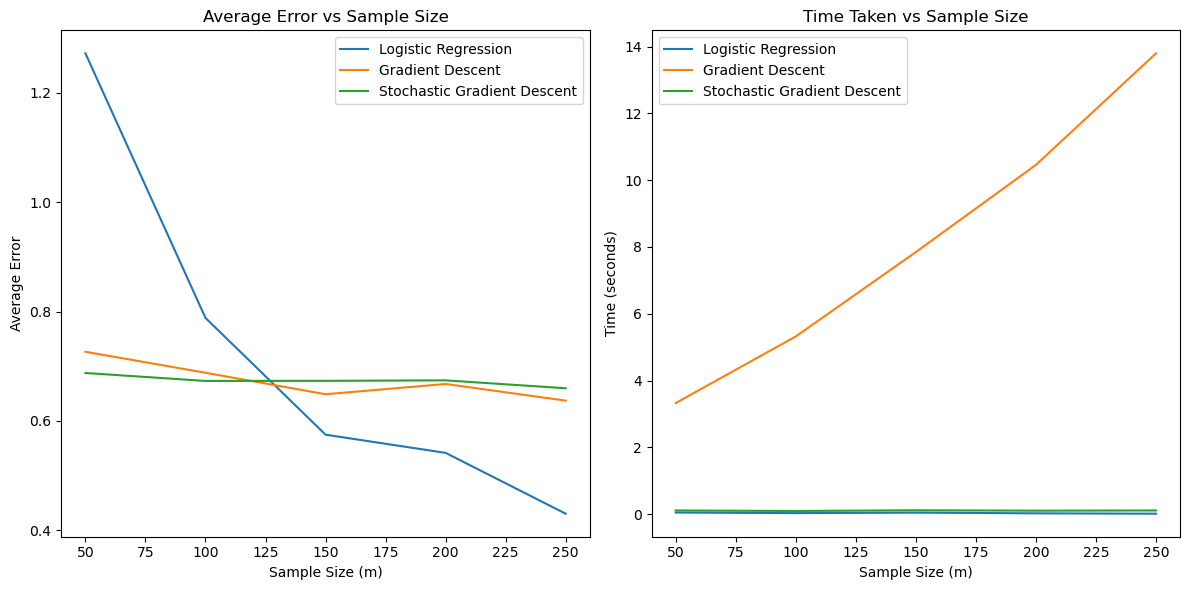

In [58]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(m_values, errors_lr, label='Logistic Regression')
plt.plot(m_values, errors_gd, label='Gradient Descent')
plt.plot(m_values, errors_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error')
plt.title('Average Error vs Sample Size')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(m_values, times_lr, label='Logistic Regression')
plt.plot(m_values, times_gd, label='Gradient Descent')
plt.plot(m_values, times_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs Sample Size')
plt.legend()

plt.tight_layout()
plt.show()

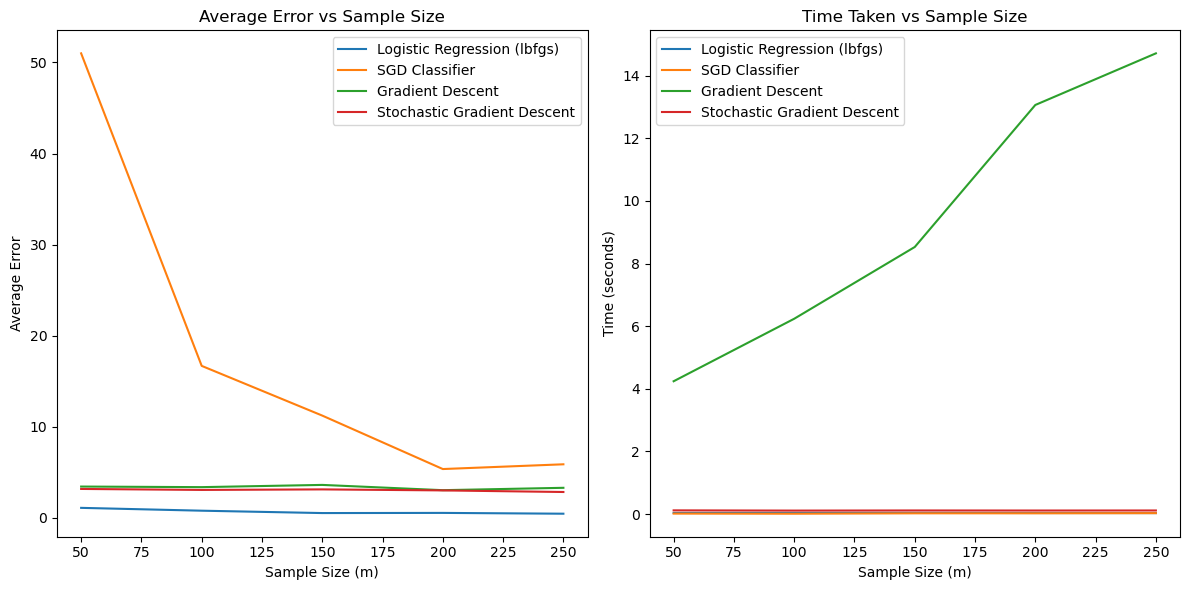

In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def generate_data(m):
    # Generate w* from a standard normal distribution
    w_star = np.random.randn(10)
    
    # Normalize w* to have an Euclidean norm of 1
    w_star /= np.linalg.norm(w_star)
    
    # Generate the training set
    X = np.random.randn(m, 10)
    probabilities = sigmoid(np.dot(X, w_star))
    
    # Generate y_i based on the calculated probabilities
    Y = np.random.rand(m) <= probabilities
    
    return w_star, X, Y.astype(int)

def train_logistic_regression(X, Y, solver='lbfgs'):
    # Create a logistic regression model with a maximum of 1000 iterations
    model = LogisticRegression(solver=solver, max_iter=1000)
    # Fit the model to the training data
    model.fit(X, Y)
    # Return the learned coefficients
    return model.coef_.flatten()

def train_sgd_classifier(X, Y):
    # Create an SGD classifier model with a logistic loss function
    model = SGDClassifier(loss='log_loss', max_iter=1000)
    # Fit the model to the training data
    model.fit(X, Y)
    # Return the learned coefficients
    return model.coef_.flatten()

def gradient_descent(X, Y, eta=0.01, iterations=1000):
    m, n = X.shape
    w = np.random.randn(n)  # Initialize weights randomly
    for t in range(iterations):
        gradient = np.zeros(n)
        for i in range(m):
            xi = X[i]
            yi = Y[i]
            prediction = sigmoid(np.dot(w, xi))
            gradient += (prediction - yi) * prediction * (1 - prediction) * xi
        gradient /= m
        w -= eta * gradient
    return w

def stochastic_gradient_descent(X, Y, eta=0.01, iterations=1000):
    m, n = X.shape
    w = np.random.randn(n)  # Initialize weights randomly
    for t in range(iterations):
        # Pick a random index
        i = np.random.randint(m)
        xi = X[i]
        yi = Y[i]
        prediction = sigmoid(np.dot(w, xi))
        gradient = (prediction - yi) * prediction * (1 - prediction) * xi
        w -= eta * gradient
    return w

def evaluate_algorithm(algorithm, m_values, num_trials=10, eta=0.01, iterations=1000):
    errors = []
    times = []
    
    for m in m_values:
        total_error = 0
        start_time = time.time()
        
        for _ in range(num_trials):
            # Generate fresh w* and fresh training data
            w_star, X, Y = generate_data(m)
            
            # Train the algorithm and get w_prime
            if algorithm == 'logistic_regression':
                w_prime = train_logistic_regression(X, Y)
            elif algorithm == 'sgd_classifier':
                w_prime = train_sgd_classifier(X, Y)
            elif algorithm == 'gradient_descent':
                w_prime = gradient_descent(X, Y, eta, iterations)
            elif algorithm == 'stochastic_gradient_descent':
                w_prime = stochastic_gradient_descent(X, Y, eta, iterations)
            
            # Calculate the error
            error = np.linalg.norm(w_star - w_prime)
            total_error += error
        
        avg_error = total_error / num_trials
        errors.append(avg_error)
        times.append(time.time() - start_time)
    
    return errors, times

# Set the sample sizes to evaluate
m_values = [50, 100, 150, 200, 250]

# Evaluate each algorithm
errors_lr, times_lr = evaluate_algorithm('logistic_regression', m_values)
errors_sgd_clf, times_sgd_clf = evaluate_algorithm('sgd_classifier', m_values)
errors_gd, times_gd = evaluate_algorithm('gradient_descent', m_values)
errors_sgd, times_sgd = evaluate_algorithm('stochastic_gradient_descent', m_values)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(m_values, errors_lr, label='Logistic Regression (lbfgs)')
plt.plot(m_values, errors_sgd_clf, label='SGD Classifier')
plt.plot(m_values, errors_gd, label='Gradient Descent')
plt.plot(m_values, errors_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error')
plt.title('Average Error vs Sample Size')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(m_values, times_lr, label='Logistic Regression (lbfgs)')
plt.plot(m_values, times_sgd_clf, label='SGD Classifier')
plt.plot(m_values, times_gd, label='Gradient Descent')
plt.plot(m_values, times_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs Sample Size')
plt.legend()

plt.tight_layout()
plt.show()


# Problem 2

In [3]:
from sklearn import datasets

In [4]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.